# 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 生成随机数据

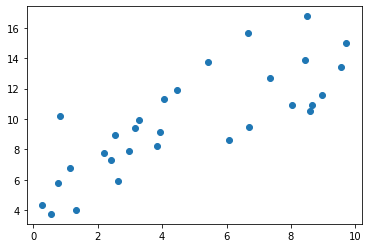

In [2]:
# generate synthetic data
m = 30  # number of sample data
x_max = 10  # max value of x
np.random.seed(43) # fix random seed
x = np.random.random_sample(m) * x_max
noise = np.random.randint(0, x_max, m) * np.random.random_sample(m)
y = 0.2*x + np.sqrt(x) * 3 + noise
y = y.reshape(m,1)
plt.scatter(x, y)
# print(x, y)

## 1 一元线性回归

### 1.1 使用Sklearn训练一元线性回归模型

[[0.8783758]] [5.67917241]


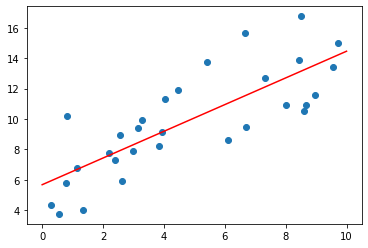

In [3]:
# train model with sklearn
linear_model = LinearRegression()
# vectorize x and y
X = x.reshape(m, 1)
# print(X,y)
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)
# visualize fit line
plt.scatter(x, y)
xx = np.array([0,x_max])
yy_sk = linear_model.coef_[0] * xx + linear_model.intercept_
plt.plot(xx, yy_sk, label='Linear regression with sklearn', c='r');

### 1.2 使用正规方程求得一元线性回归的解析解

In [4]:
from numpy.linalg import inv
def normalEquation(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

In [5]:
# transform X and y to fit our model
X_m_2 = np.c_[np.ones(m), x]  # theta[0]的系数为1
y_m_1 = np.c_[y]

In [6]:
theta_norm = normalEquation(X_m_2, y)
print(theta_norm)

[[5.67917241]
 [0.8783758 ]]


### 1.3 使用梯度下降法训练一元线性回归模型

In [7]:
def computeCost(X, y, theta):
    hypothesis = X.dot(theta)
    residual = hypothesis - y
    J = 1/2/m * residual.T.dot(residual)
    return J

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # save all cost values overn_iterations
    J_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, len(theta)))

    for n_iter in range(num_iters):
        hypothesis = X.dot(theta)
        theta -= alpha / m * ( X.T.dot(hypothesis - y) )  # core step of gradient descent
#         print(theta.shape)
        J_history[n_iter] = computeCost(X, y, theta)
        theta_history[n_iter,:] = theta.reshape(theta.shape[1], theta.shape[0])
    return (theta, J_history, theta_history)

# def gradientDescent(X, y, theta, alpha, num_iters):
#     # save all cost values overn_iterations
#     J_history = np.zeros(num_iters)
#     theta_history = np.zeros((num_iters, 2))
#     for n_iter in range(num_iters):
#         hypothesis = X.dot(theta)
#         theta -= alpha / m * ( X.T.dot(hypothesis - y) )  # core step of gradient descent
#         J_history[n_iter] = computeCost(X, y, theta)
#         theta_history[n_iter,:] = theta.reshape(1,2)
#     return (theta, J_history, theta_history)

In [9]:
# config learing parameters
theta_0 = [[0],[0]]  # initial theta
alpha = 0.01  # learning rate
num_iters = 1000
# train our own model
theta_gd, J_history, theta_history = gradientDescent(X_m_2, y_m_1, theta_0, alpha, num_iters)
print(theta_gd)

[[5.35282092]
 [0.92760198]]


Text(0.5, 0, 'iteration number')

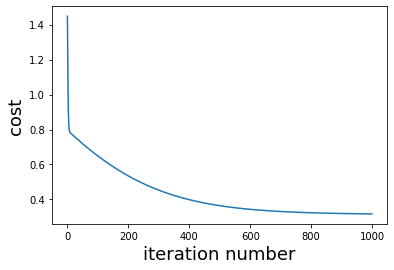

In [10]:
# visualization of cost history
# plt.ylim([2.2, 5])
# plt.plot(J_history)
plt.plot(np.log10(J_history))
plt.ylabel('cost', fontsize=18)
plt.xlabel('iteration number', fontsize=18)

### 1.4 对比三种训练方式的结果

#### 1.4.1 可视化对比

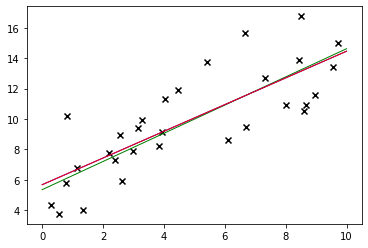

In [11]:
# visualization of results plot
yy_gd = theta_gd[0] + theta_gd[1] * xx
yy_norm = theta_norm[0] + theta_norm[1] * xx
plt.scatter(x, y, marker='x', c='k');

plt.plot(xx, yy_gd, c='g', label='gradient descent', linewidth=1);
plt.plot(xx, yy_sk, c='b', label='sklearn', linewidth=1);
plt.plot(xx, yy_norm, c='r', label='normal equation', linewidth=1);

#### 1.4.2 对比代价函数的计算结果

In [12]:
print(computeCost(X_m_2, y_m_1, theta_gd))
print(computeCost(X_m_2, y_m_1, theta_norm.reshape(2,1)))
print(computeCost(X_m_2, y_m_1, [linear_model.intercept_, linear_model.coef_]))

[[2.07610392]]
[[2.06081832]]
[[2.06081832]]


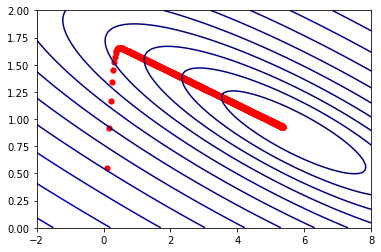

In [13]:
# visualize cost as contour
# Create grid coordinates for plotting
B0 = np.linspace(-2, 8, 80)
B1 = np.linspace(0, 2, 80)
xx_mesh, yy_mesh = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X_m_2, y, theta=[[xx_mesh[i,j]], [yy_mesh[i,j]]])

# Left plot
plt.contour(xx_mesh, yy_mesh, Z, np.logspace(-2, 3, 40), cmap=plt.cm.jet)
plt.scatter(theta_history[: ,0],theta_history[:, 1], c='r', linewidths=0.2)

### 由于一元线性回归无法很好地拟合，使用多项式回归

## 2. 多项式回归

### 2.1 Sklearn训练多项式回归模型

In [14]:
# polynomial regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

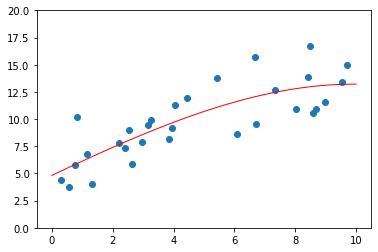

In [15]:
# sklearn method
degree = 3
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
# print(model.named_steps.ridge.coef_[0,1:3])
ridge_model = model.named_steps['ridge']
# print(model.named_steps)
theta_3_1_sk = np.c_[ridge_model.intercept_, ridge_model.coef_[:,1:degree+1]].reshape(degree+1, 1)
X_plot = np.linspace(0, 10, 100)[:, np.newaxis]
plt.scatter(x, y)
y_plot_poly_sk = model.predict(X_plot)
plt.ylim([0,20])
plt.plot(X_plot, y_plot_poly_sk, c='r', linewidth=1,label="degree %d" % degree)

### 2.2 正规方程求得多项式回归模型的解析解

In [16]:
# normal equation method
x_square = x * x
X_m_3 = np.c_[X_m_2, x_square.reshape(m,1)]
theta_3_1_norm = normalEquation(X_m_3, y.reshape(m,1))
print(theta_3_1_norm)

[[ 4.47991439]
 [ 1.62809046]
 [-0.07449302]]


### 2.3 梯度下降法训练多项式回归模型

[[0.39047036]
 [0.92056309]
 [0.07784229]]


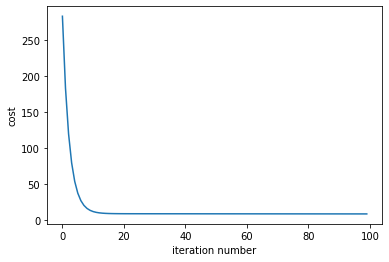

In [17]:
# gradient descent method
# assume 2nd degree
np.random.seed(42)
theta_3_1_init = np.random.rand(3,1)
alpha_poly = 0.0001
num_iter_poly = 100
theta_3_1_gd, J_history_poly, theta_history = gradientDescent(X_m_3, y, theta_3_1_init, alpha_poly, num_iter_poly)
print(theta_3_1_gd)

# visualization of cost history
# plt.ylim([0, 10])  # zoom in to check gradient descent rate
plt.plot(J_history_poly);
plt.ylabel('cost');
plt.xlabel('iteration number');

### 2.4 可视化对比三种训练方式的结果

In [ ]:
np.linspace()

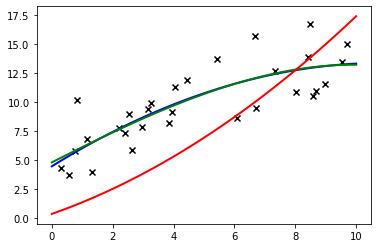

In [21]:

x_plot = np.linspace(0, x_max, 100)
# y_plot = 
linewidth = 2
y_plot_poly_norm = theta_3_1_norm[0] + theta_3_1_norm[1]*x_plot + theta_3_1_norm[2]*(x_plot*x_plot)
y_plot_poly_gd = theta_3_1_gd[0] + theta_3_1_gd[1]*x_plot + theta_3_1_gd[2]*(x_plot*x_plot)

# visualize data and curve
plt.scatter(x, y, marker='x', c='k');
plt.plot(x_plot, y_plot_poly_norm, c='b', linewidth=linewidth,label="normal equation");
plt.plot(x_plot, y_plot_poly_sk, c='g', linewidth=linewidth,label="sklearn");
plt.plot(x_plot, y_plot_poly_gd, c='r', linewidth=linewidth,label="gradient descent");
# plt.legend()

#### 对比代价函数

In [ ]:
print(computeCost(X_m_3, y.reshape(m,1), theta_3_1_norm))
print(computeCost(X_m_3, y.reshape(m,1), theta_3_1_sk))
print(computeCost(X_m_3, y.reshape(m,1), theta_3_1_gd))

#### 多变量线性回归的实现方式与多项式回归非常相似，只需更换X的数据即可，这里不再演示